# Exploratory Data Analysis

### Summar

ANOVA results show that both anime type and genre significantly impact ratings, with statistically significant differences in mean ratings across these categories. Additionally, correlation analysis reveals that while ratings are moderately related to member engagement metrics, such as members, views_without_review, and rating_counts, the number of episodes has little influence on ratings. Strong correlations among member-related metrics suggest they are driven by the overall popularity of the anime.


In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pingouin

### Loading Data <a id='loading_data'></a>

In [78]:
anime_df = pd.read_csv('data/anime_df.csv', index_col=1)
rating_df = pd.read_csv('data/rating_df.csv', index_col=0)

In [79]:
anime_df.drop(columns=["Unnamed: 0"], inplace=True)

In [80]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11911 entries, 32281 to 26081
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  11911 non-null  object 
 1   type                  11911 non-null  object 
 2   episodes              11911 non-null  int64  
 3   rating                11911 non-null  float64
 4   members               11911 non-null  int64  
 5   Action                11911 non-null  int64  
 6   Adventure             11911 non-null  int64  
 7   Cars                  11911 non-null  int64  
 8   Comedy                11911 non-null  int64  
 9   Dementia              11911 non-null  int64  
 10  Demons                11911 non-null  int64  
 11  Drama                 11911 non-null  int64  
 12  Ecchi                 11911 non-null  int64  
 13  Fantasy               11911 non-null  int64  
 14  Game                  11911 non-null  int64  
 15  Harem               

In [81]:
anime_df.head()

,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,views_without_review,rating_counts
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,0,...,0,0,0,1,0,0,0,0,238,1961
5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3080,21494
28977,Gintama°,TV,51,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,198,1188
9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2132,17151
9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,558,3115


In [82]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### User-based rating distributions

In [83]:
rating_df['rating'].describe()

count    7.813737e+06
mean     6.144030e+00
std      3.727800e+00
min     -1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of User Ratings for Animes')

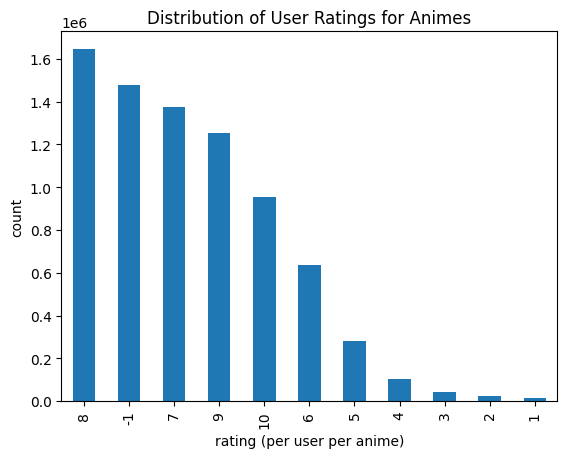

In [84]:
rating_df['rating'].value_counts().plot.bar()
plt.xlabel('rating (per user per anime)')
plt.ylabel('count')
plt.title('Distribution of User Ratings for Animes')

Most users give average of 7-9 rating to animes, both from the perspective of raw distribution count and per user rating average.

### What's the average rating one person give

count    69600.000000
mean         8.227761
std          0.902856
min          1.000000
25%          7.666667
50%          8.193548
75%          8.815789
max         10.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Ratings per User')

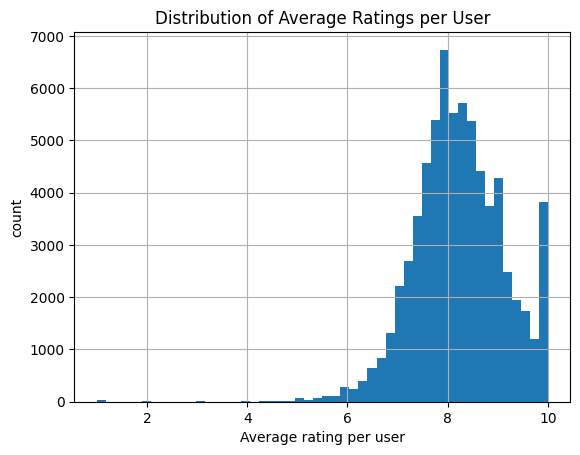

In [85]:
mean_rating_per_user = rating_df[rating_df['rating']>=0].groupby('user_id')['rating'].mean()
print(mean_rating_per_user.describe())

mean_rating_per_user.hist(bins=50)
plt.xlabel('Average rating per user')
plt.ylabel('count')
plt.title('Distribution of Average Ratings per User')

Most people give average ratings between 7-9.

### How many anime does one person rate

count    69600.000000
mean        91.052313
std        135.764253
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
Name: anime_id, dtype: float64


Text(0.5, 1.0, 'Distribution of Ratings Counts per User')

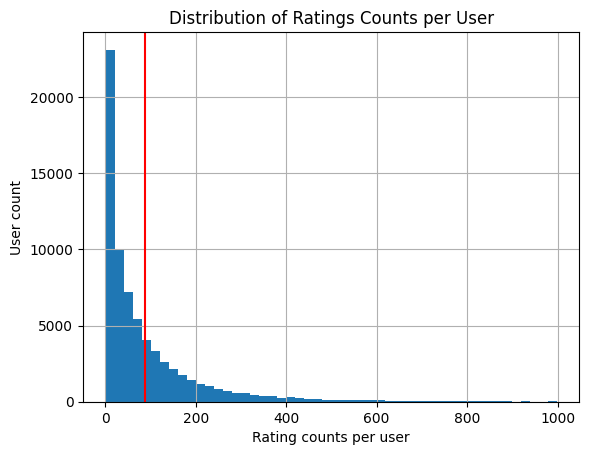

In [86]:
count_per_user = rating_df[rating_df['rating']>=0].groupby('user_id').count()['anime_id']
print(count_per_user.describe())
count_per_user = count_per_user[count_per_user<1000]
count_per_user.hist(bins=50)
plt.axvline(count_per_user.mean(), color='r')
plt.xlabel('Rating counts per user')
plt.ylabel('User count')
plt.title('Distribution of Ratings Counts per User')

We see a wide range of number of ratings a person gives. In average, a user rate 91 animes, and 50% of the users rate 13-114 animes.

### Is there a relationship between user's average rating and user's rating counts

Text(0.5, 1.0, 'Relationship Between User’s Average Rating and Rating Count per User')

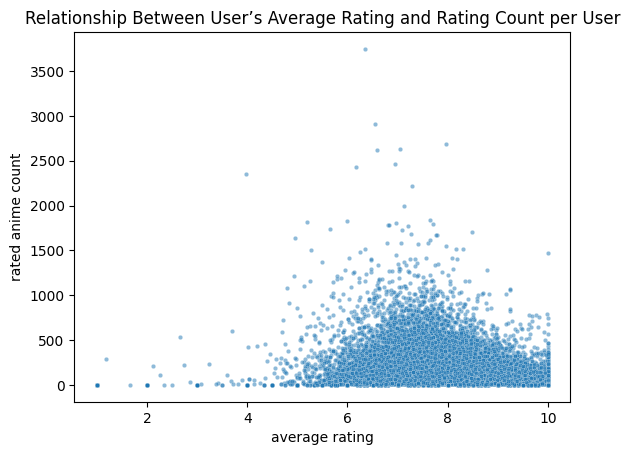

In [87]:
count = rating_df[rating_df['rating']>=0].groupby('user_id').count()
avg_rating = rating_df[rating_df['rating']>=0].groupby('user_id')['rating'].mean()
merged_df = count.merge(avg_rating, on='user_id')
sns.scatterplot(data = merged_df, y='anime_id', x='rating_y', s=10, alpha=0.5)
plt.xlabel('average rating')
plt.ylabel('rated anime count')
plt.title('Relationship Between User’s Average Rating and Rating Count per User')

In [88]:
scipy.stats.pearsonr(merged_df['anime_id'], merged_df['rating_y'])

PearsonRResult(statistic=-0.31144472253000477, pvalue=0.0)

There is a weak negative correlation between the rating and the number of ratings per user. The more anime the user rate, the lower rating they tend to give. 

### What are the rating distirbutions of the animes

count    11911.000000
mean         6.481722
std          1.021110
min          1.670000
25%          5.890000
50%          6.570000
75%          7.185000
max         10.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Ratings per Anime')

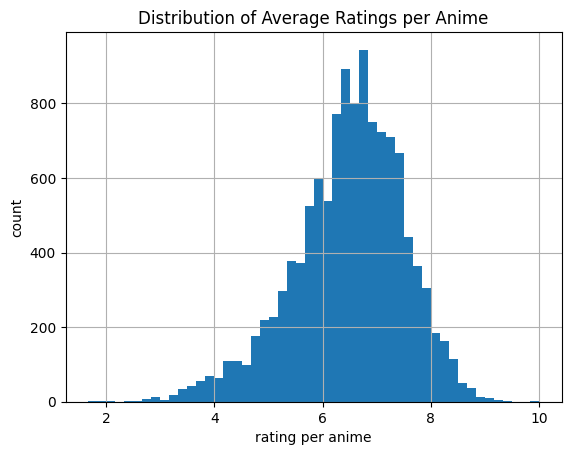

In [89]:
print(anime_df['rating'].describe())
anime_df['rating'].hist(bins=50)
plt.xlabel('rating per anime')
plt.ylabel('count')
plt.title('Distribution of Average Ratings per Anime')

Animes recieves rating of 6.5 in average, where most of the average rating ranges from 5-7.

### How many rating does each anime get

count    11200.000000
mean       697.655089
std       2028.627749
min          1.000000
25%          5.000000
50%         51.500000
75%        385.250000
max      39340.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Ratings Counts per Anime')

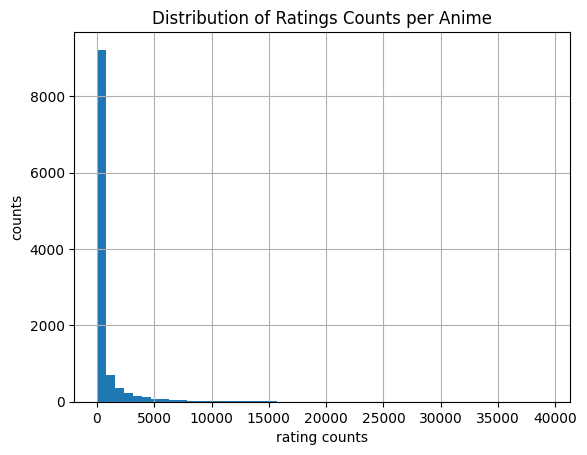

In [90]:
rating_count_per_anime = rating_df.groupby('anime_id').count()['rating']
print(rating_count_per_anime.describe())
rating_count_per_anime.hist(bins=50)
plt.xlabel('rating counts')
plt.ylabel('counts')
plt.title('Distribution of Ratings Counts per Anime')

There is a wide range for how many rating each anime gets. The average is 638, and 50% of the animes get 9-395 ratings.

Text(0.5, 1.0, 'Distribution of Ratings Counts per Anime (log)')

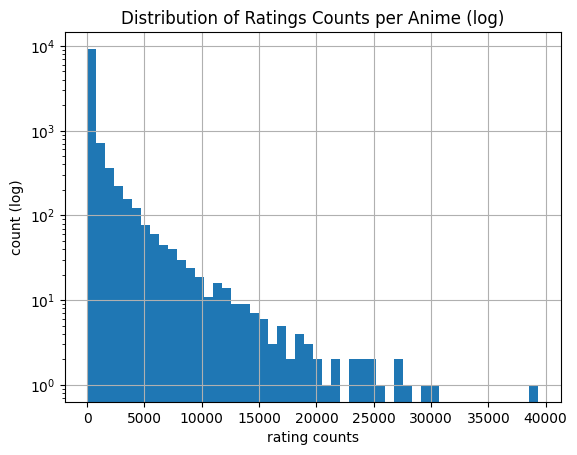

In [91]:
rating_count_per_anime.hist(bins=50)
plt.yscale('log')
plt.xlabel('rating counts')
plt.ylabel('count (log)')
plt.title('Distribution of Ratings Counts per Anime (log)')

### Is there a relationship between anime's average rating and anime's rating counts

Text(0.5, 1.0, "Relationship Between Anime's Average Rating and Rating Count per Anime")

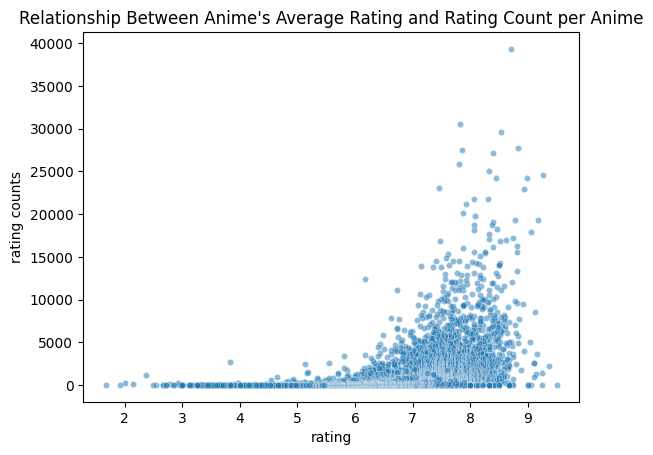

In [92]:
rating_count_per_anime
anime_df_merged = anime_df.merge(rating_count_per_anime, on='anime_id')
sns.scatterplot(data=anime_df_merged, x='rating_x', y='rating_y', s=20, alpha=0.5)
plt.xlabel('rating')
plt.ylabel('rating counts')
plt.title("Relationship Between Anime's Average Rating and Rating Count per Anime")

In [93]:
scipy.stats.pearsonr(anime_df_merged['rating_x'], anime_df_merged['rating_y'])

PearsonRResult(statistic=0.39532935130693436, pvalue=0.0)

There is a weak positive correlation between the rating and the number of ratings per anime. The more rating an anime recieves, the higher rating they tend to get. 

### Does anime type affect the rating?

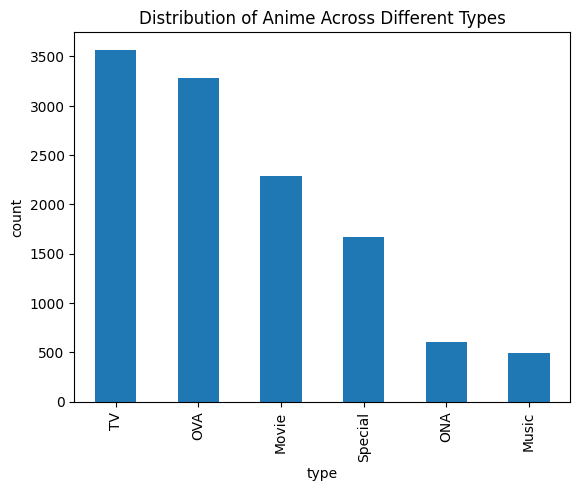

In [94]:
anime_df['type'].value_counts().plot.bar()
plt.xlabel('type')
plt.ylabel('count')
plt.title('Distribution of Anime Across Different Types')
plt.show()

Text(0, 0.5, 'rating')

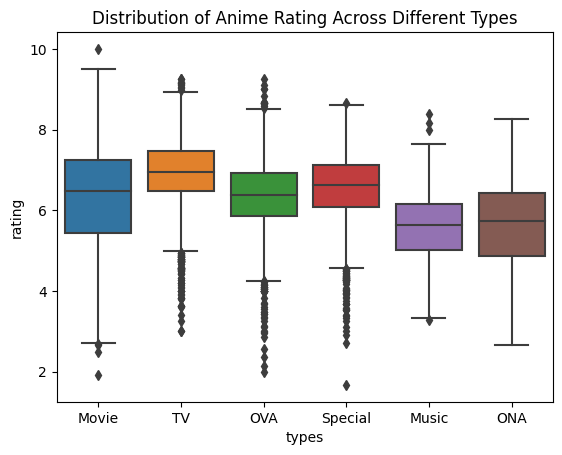

In [95]:
sns.boxplot(x='type', y='rating', data=anime_df)
plt.title('Distribution of Anime Rating Across Different Types')
plt.xlabel('types')
plt.ylabel('rating')

In [96]:
anova_results = pingouin.anova(data=anime_df,
                               dv="rating",
                               between="type")
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,type,5,11905,361.833704,0.0,0.13192


Based on the anova result, the anime type has a signiticant impact for rating. The p-unc value suggest that the difference in each type's mean rating is statistically significant, and the large value of F supports that there are larger variance across the types than with in the types.

### Does anime genre affect the rating?

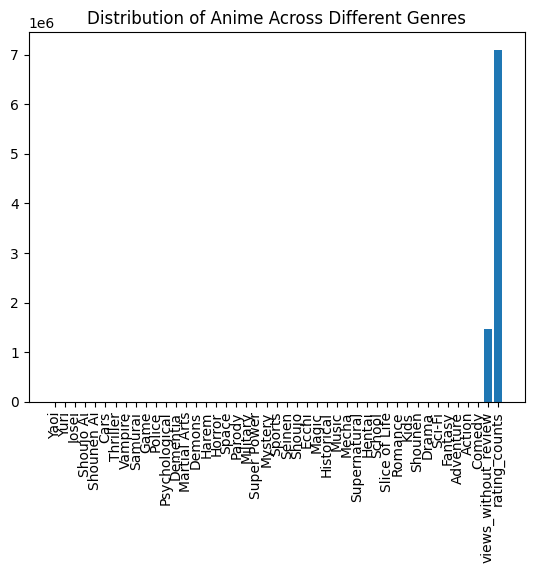

In [97]:
genres = anime_df.drop(columns=['type', 'episodes', 'rating', 'members', 'name'])
sum = genres.sum().sort_values()
plt.bar(x=sum.index, height=sum)
plt.xticks(rotation=90)
plt.title('Distribution of Anime Across Different Genres')
plt.show()

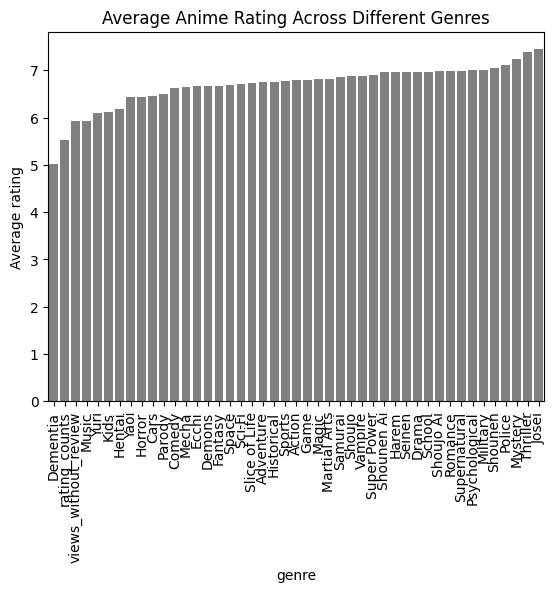

In [98]:
genre_and_rating = anime_df.drop(columns=['type', 'episodes', 'members', 'name'])

genre_avg_rating = []
for i in range(len(genres.columns)):    
    rating = genre_and_rating[genre_and_rating[genres.columns[i]] == 1]['rating']
    genre_avg_rating.append(rating.mean())

genre_avg_rating_df = pd.DataFrame({'genre': genres.columns, 'avg_rating': genre_avg_rating}).sort_values(by='avg_rating')

sns.barplot(data=genre_avg_rating_df, x='genre', y='avg_rating', color='grey')
plt.xticks(rotation=90)
plt.ylabel('Average rating')
plt.title('Average Anime Rating Across Different Genres')
plt.show()

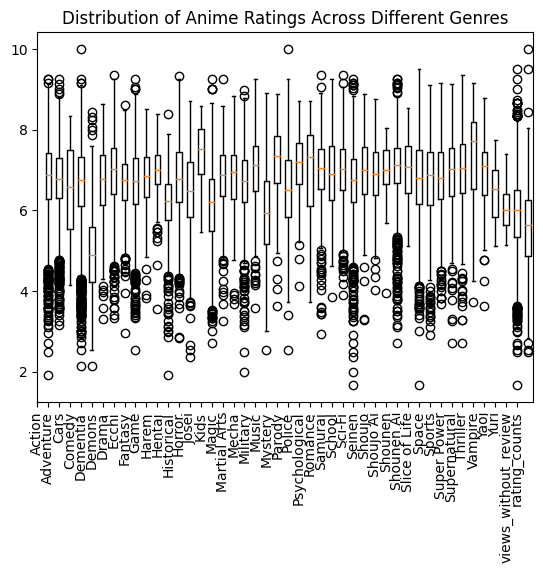

In [99]:
genre_ratings = []
for i in range(len(genres.columns)):    
    rating = genre_and_rating[genre_and_rating[genres.columns[i]] == 1]['rating']
    genre_ratings.append(rating)

plt.boxplot(genre_ratings)
plt.xticks(range(len(genres.columns)),genres.columns)
plt.xticks(rotation=90)
plt.title('Distribution of Anime Ratings Across Different Genres')
plt.show()


In [100]:
from statsmodels.formula.api import ols

# Reshape the dataframe for ANOVA
melted_df = genre_and_rating.melt(id_vars=['rating'],value_vars=genres.columns, value_name='is_genre', var_name='genre')
anova_results = pingouin.anova(data=melted_df[melted_df['is_genre'] == 1], dv="rating", between="genre")
anova_results


,Source,ddof1,ddof2,F,p-unc,np2
0,genre,44,37993,144.076493,0.0,0.142996


Based on the anova result, the genre has a signiticant impact for rating. The p-unc value suggest that the difference in each type's mean rating is statistically significant, and the large value of F supports that there are larger variance across the genres than with in the genres.

### Relationships among multiple features

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

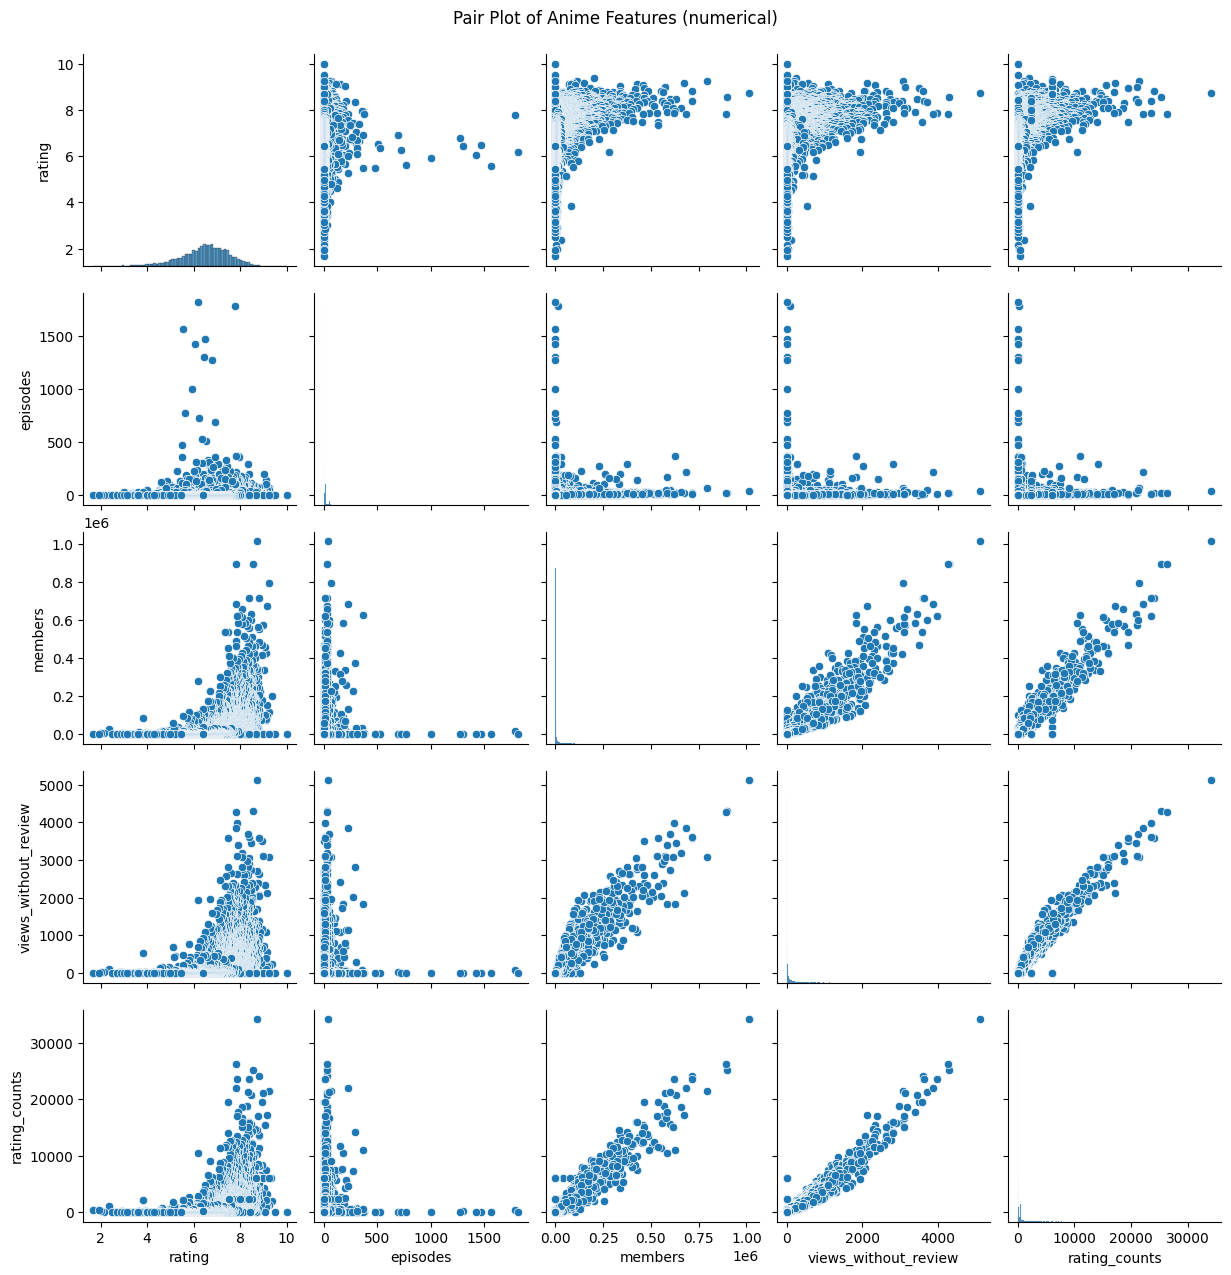

In [101]:
sns.pairplot(anime_df[['rating', 'episodes', 'members', 'views_without_review', 'rating_counts']])
plt.suptitle('Pair Plot of Anime Features (numerical)', y=1.02)
plt.show()

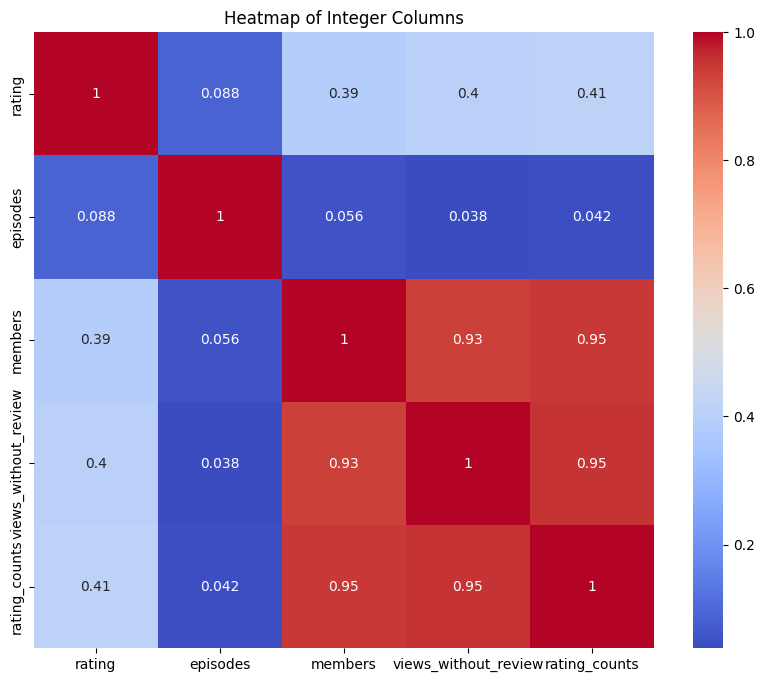

In [102]:
num_columns = anime_df[['rating', 'episodes', 'members', 'views_without_review', 'rating_counts']]
plt.figure(figsize=(10, 8))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Integer Columns')
plt.show()

### PCA

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [132]:
# Convert type into dummy_data
type_dummy = pd.get_dummies(anime_df['type'], dtype='int') 
type_dummy.rename(columns={'Music': 'Music_Type'}, inplace=True)
anime_df_dummies = anime_df.merge(type_dummy, on='anime_id')
anime_df_dummies.columns

Index(['name', 'type', 'episodes', 'rating', 'members', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'views_without_review',
       'rating_counts', 'Movie', 'Music_Type', 'ONA', 'OVA', 'Special', 'TV'],
      dtype='object')

In [146]:
features = anime_df_dummies.drop(columns=['type', 'name', 'rating'])
scaled_features = scale(features)

In [147]:
pca = PCA().fit(scaled_features)
print(pca.explained_variance_ratio_)
print(pca.get_feature_names_out())

[7.09114774e-02 4.67245829e-02 3.94770657e-02 3.75415052e-02
 3.61903290e-02 3.11065331e-02 3.08393190e-02 2.84741579e-02
 2.82096302e-02 2.74041361e-02 2.49997464e-02 2.33118489e-02
 2.24536550e-02 2.20557283e-02 2.14622482e-02 2.08177361e-02
 2.02177406e-02 1.97797244e-02 1.94227453e-02 1.90934474e-02
 1.88889322e-02 1.85434994e-02 1.81824039e-02 1.77289476e-02
 1.76205789e-02 1.73903651e-02 1.66095057e-02 1.61672745e-02
 1.59757806e-02 1.57402290e-02 1.52361281e-02 1.45904833e-02
 1.43435812e-02 1.38235350e-02 1.37870202e-02 1.33646258e-02
 1.31634278e-02 1.27778219e-02 1.26172721e-02 1.25601198e-02
 1.22895881e-02 1.19123092e-02 1.17298465e-02 1.10864675e-02
 1.07088904e-02 1.01182743e-02 9.96331688e-03 9.26218039e-03
 6.68964801e-03 4.71198598e-03 1.14454255e-03 7.78060965e-04
 1.00978747e-18]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca2

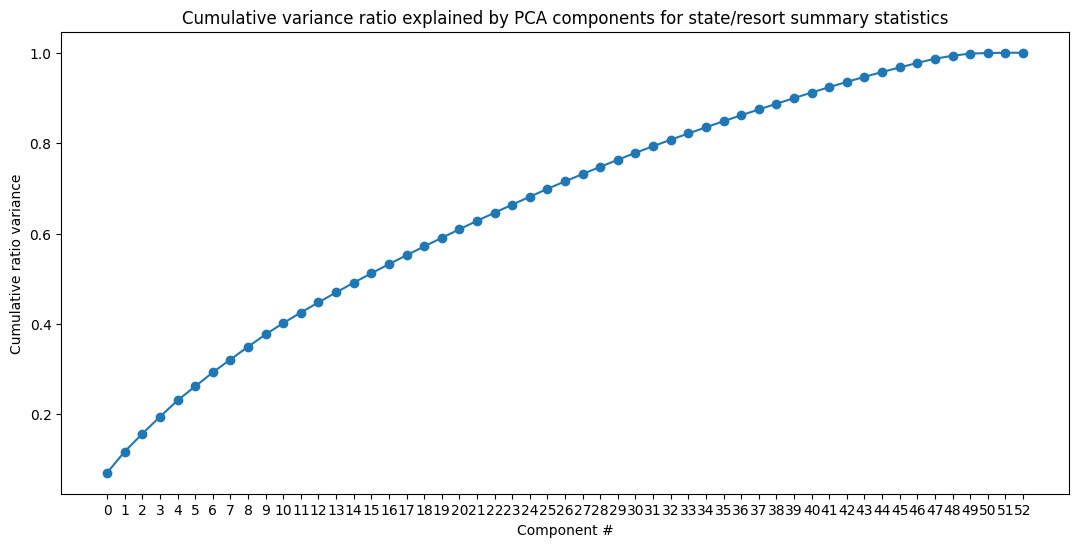

In [148]:
plt.subplots(figsize=(13, 6))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Component #')
plt.xticks(ticks =np.arange(0,53))
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');